In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# help(pd.set_option)
pd.set_option('display.max_columns',100)

In [3]:
df = pd.read_excel(r"A:\Documents\ffpl\PPM\June_2024-Online.xlsx")

In [4]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96
0,NaN,Revision no: 16/ 21.08.2023 (new defect list a...,NaN,NaN,NaN,Receipt of material,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADV assly on filter,NaN,Head & Filter Asy,NaN,NaN,Head & Filter Assembly Leakage Testing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Declamping of leak test plug,NaN,NaN,NaN,Final inspection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Date,Shift,Part No,Production Quantity,Filter nut plate wrong (S),Filter screen overlap (S),Filter dent & damage (S),Filter paint not ok (S),Filter screen not ok (S),Filter nut plate thread damage/ Go gauge not p...,No GO gauge pass in nut plate thread (S),Head sealing surface damage (R),Wrong filter (S),Wrong head (R),Head rusty (R),Supplier mounted adaptor thread damage (R),Go gauge not pass in head port (R),No Go gauge pass in head port (R),Wrong Drain valve (S),Loose DV clip fitment (S),Drain valve damage (S),Drain valve wire cut (S),DV pipe missing (S),Flow tube fall inside filter (S),Part found with PPI rejection marking ( R),Cartridge/ Element O ring miss (R),Filter gasket/ grommet cut (S),Head adaptor rusty (R),Filter seam shift (S),Adaptor/ Connector dent/damage ®,DV incline fitment S),DV O ring miss (S),DV loose(S),Parts received without PPI inspection ®,DV torque confirmation marking miss (S),ADV thread not ok (R),ADV wire cut (R),Supplier head mounting adaptor loose ( R),Shell grove OD oversize (R),Supplier's head mounting adaptor height not ok...,Leak through filter seam (S),Filter Squarness not ok (S),Head Squarness not ok (R),Filter crimp nut leak (S),Head casting leak (R),VPP head leak through crimp portion (P),VPP head leak through rivet joint (P),Leak through breathing/ bleed screw (R),VPP head leak due to defect in diaphragm (R),Head leak through sealing surface (P),Head leak through sealing surface (R),Head leak from O ring/ gasket (P),Head leakage through adaptor/ connector (P),HPP leak through priming pump (P),Filter flow path blockage (S),Casting head gallery blockage (R),Leakage through washer sealing (P),Head leak through adaptor (P),DV leak from body (S),ADV leak from body (R),DV leak from O-ring (S),Assembly fall inside water tank (P),Leak through heater (R),Leakage through plastic bleed screw (R),VPP head leak due to Head flatness not ok (R),Leakage through filter shell (S),Leak through filter sensor body (S),Adaptor/ Connector crack ®,Leakge through washer sealing (R),Dent /damage on connector(P),Head sealing surface damage (P),Head sealing surface flatness not ok (P),Bulging at head sealing surface (P),Go gauge not pass in head port (P),No Go gauge pass in head port (P),Filter damage (P),Wrong filter (P),Wrong head

In [5]:
df = pd.read_excel(r"A:\Documents\ffpl\PPM\June_2024-Online.xlsx",header=2)

In [6]:
df.shape

(1434, 97)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1434 entries, 0 to 1433
Data columns (total 97 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Unnamed: 0                                                                 0 non-null      float64
 1   Date                                                                       34 non-null     object 
 2   Shift                                                                      442 non-null    object 
 3   Part No                                                                    942 non-null    object 
 4   Production Quantity                                                        936 non-null    object 
 5   Filter nut plate wrong (S)                                                 437 non-null    object 
 6   Filter screen overlap (S)                               

In [8]:
#removed 1st columns due to 0 non-null values
df.drop(df.columns[0],axis=1,inplace=True)

In [9]:
df['Date'].unique()
#need to drop holiday and ' ' to clean data 

array([datetime.datetime(2024, 6, 1, 0, 0), nan,
       datetime.datetime(2024, 6, 2, 0, 0),
       datetime.datetime(2024, 6, 3, 0, 0),
       datetime.datetime(2024, 6, 4, 0, 0),
       datetime.datetime(2024, 6, 5, 0, 0),
       datetime.datetime(2024, 6, 6, 0, 0), 'Holiday',
       datetime.datetime(2024, 6, 7, 0, 0),
       datetime.datetime(2024, 6, 8, 0, 0),
       datetime.datetime(2024, 6, 9, 0, 0),
       datetime.datetime(2024, 6, 10, 0, 0),
       datetime.datetime(2024, 6, 11, 0, 0),
       datetime.datetime(2024, 6, 12, 0, 0),
       datetime.datetime(2024, 6, 13, 0, 0),
       datetime.datetime(2024, 6, 14, 0, 0),
       datetime.datetime(2024, 6, 15, 0, 0), ' ',
       datetime.datetime(2024, 6, 16, 0, 0),
       datetime.datetime(2024, 6, 17, 0, 0),
       datetime.datetime(2024, 6, 18, 0, 0),
       datetime.datetime(2024, 6, 19, 0, 0),
       datetime.datetime(2024, 6, 20, 0, 0),
       datetime.datetime(2024, 6, 21, 0, 0),
       datetime.datetime(2024, 6, 22, 0, 0)

In [10]:
df.loc[:,'Date']=df.drop(df[df['Date'].isin(['Holiday',' ']) & df['Part No'].isna()].index)
#droped rows which is not required like holiday and space ' '

In [11]:
df[df['Date']==' '] = np.nan
#replace with np.nan to ffill

In [12]:
df['Date'] = df['Date'].ffill()

C:\Users\aksha\AppData\Local\Temp\ipykernel_17816\1436720069.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Date'] = df['Date'].ffill()


In [13]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce') 
# change dtype object to date
# df['Date'] = df['Date'].dt.normalize()
# strip time from date while  keeping the column as datetime64[ns]

In [14]:
df['Shift'].unique()
#neet to drop unneccessay rows and extra table

array(['II', nan, 'I', ' ', 'SR.NO.', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
       12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
       46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62,
       63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
       80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,
       97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
       124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
       150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188,
       189, 190, 191, 192, 193, 194, 195, 196,

In [15]:
df.head(10)

,Date,Shift,Part No,Production Quantity,Filter nut plate wrong (S),Filter screen overlap (S),Filter dent & damage (S),Filter paint not ok (S),Filter screen not ok (S),Filter nut plate thread damage/ Go gauge not pass in nut plate thread (S),No GO gauge pass in nut plate thread (S),Head sealing surface damage (R),Wrong filter (S),Wrong head (R),Head rusty (R),Supplier mounted adaptor thread damage (R),Go gauge not pass in head port (R),No Go gauge pass in head port (R),Wrong Drain valve (S),Loose DV clip fitment (S),Drain valve damage (S),Drain valve wire cut (S),DV pipe missing (S),Flow tube fall inside filter (S),Part found with PPI rejection marking ( R),Cartridge/ Element O ring miss (R),Filter gasket/ grommet cut (S),Head adaptor rusty (R),Filter seam shift (S),Adaptor/ Connector dent/damage ®,DV incline fitment S),DV O ring miss (S),DV loose(S),Parts received without PPI inspection ®,DV torque confirmation marking miss (S),ADV thread not ok (R),ADV wire cut (R),Supplier head mounting adaptor loose ( R),Shell grove OD oversize (R),Supplier's head mounting adaptor height not ok ( R),Leak through filter seam (S),Filter Squarness not ok (S),Head Squarness not ok (R),Filter crimp nut leak (S),Head casting leak (R),VPP head leak through crimp portion (P),VPP head leak through rivet joint (P),Leak through breathing/ bleed screw (R),VPP head leak due to defect in diaphragm (R),Head leak through sealing surface (P),Head leak through sealing surface (R),Head leak from O ring/ gasket (P),Head leakage through adaptor/ connector (P),HPP leak through priming pump (P),Filter flow path blockage (S),Casting head gallery blockage (R),Leakage through washer sealing (P),Head leak through adaptor (P),DV leak from body (S),ADV leak from body (R),DV leak from O-ring (S),Assembly fall inside water tank (P),Leak through heater (R),Leakage through plastic bleed screw (R),VPP head leak due to Head flatness not ok (R),Leakage through filter shell (S),Leak through filter sensor body (S),Adaptor/ Connector crack ®,Leakge through washer sealing (R),Dent /damage on connector(P),Head sealing surface damage (P),Head sealing surface flatness not ok (P),Bulging at head sealing surface (P),Go gauge not pass in head port (P),No Go gauge pass in head port (P),Filter damage (P),Wrong filter (P),Wrong head (P),Leak test identification mark missing (P),Functional test mark missing on head (P),Scratch mark on filter (P),Filter paint not ok (P),Washer missing on adaptor/ connector asy (P),Torque mark missing on adaptor/ connector (P),O ring presence dot mark missing (P),Element present dot mark missing on hydraulic filter (P),Head damage (P),Reed valve damage (P),Loosening of Adaptor/Pump (P),Double washer on adaptor/ connector asy (P),Supplier leak testing punch missing (R),Washer missing (P),Washer missing (R),Scratch on head sealing surface (P),HPP pump not lock ®,Unnamed: 96
0,2024-06-01,II,5023377,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-06-01,NaN,5000825,30,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-06-01,NaN,5010284,60,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [16]:
df.loc[df['Shift'].str.lower()=='sr.no.'].index
df = df.iloc[:1053]
#drop rows after 1053

In [17]:
df.loc[:, 'Shift'] = df['Shift'].apply(lambda x: x if x in ["I", "II"] else np.nan).ffill()
df = df.reset_index(drop=True)  # If you need to reset the whole DataFrame's index


In [18]:
df['Part No'].unique()
#clean or drop irrelevent rows

array([5023377, 5000825, 5010284, 5038945, 5010297, 5002383, 5010519,
       5023395, 8710122, 8710102, 5026608, 5015095, nan, 'Total', 'PPM',
       5010300, 8710244, 8710161, 8710010, 8710160, 8710081, 5028752,
       5007512, 5023428, 5024791, 8710147, 5018840, 5010515, 8710196,
       5037085, 5039741, 8710124, 8710165, 5001687, 5035643, 5006663,
       5000213, 5009248, 5038956, 5025011, 8710345, 5014096, 5005267,
       5001551, 5015096, 8710137, 8710101, 5006352, 8710334, 8710115,
       8710071, 8710056, 5031771, 5023493, 8710300, 5010285, 5009219,
       5030896, 5028753, 5038478, 8710100, 8710050, 5028157, 5000548,
       8710328, 5025374, 8710055, 8710210, 5011164, 5028705, 8710136,
       8321030, 8710305, 'FH21708', 5011154, 8710330, 5022974, 5038738,
       5003962, 5032259, 5031204, 5032252, 5039701, 5032516, 5039700,
       5027783, 5021136, 8710215, 8710301, 5000036, 5025383, 8710169,
       5029090, 8710159, 8710216, 5024026, 5004916, 5022976, 'TOTAL',
       5012831,

In [19]:
df= df[~(
    df['Part No'].astype(str).str.lower().isin(['total', 'ppm']) |
    df['Part No'].isna()
)].astype(str)
df=df.reset_index(drop=True)
#removed unnecessary rows

In [20]:
# df.loc[:,'Production Quantity']
df = df[~(df['Production Quantity']==0)]

In [21]:
df = df.reset_index(drop=True)

In [22]:
df = df.dropna(how='all').reset_index(drop=True)
#drop rows which all are nun

In [23]:
df = df.dropna(axis=1, how='all')
#drop columns which all has null values

In [24]:
df.drop(df.columns[-1],axis=1,inplace=True)

In [25]:
df['Production Quantity']= df['Production Quantity'].astype(int)

In [26]:
df.shape

(499, 95)

In [27]:
df_production = df[df.columns[0:4]].copy()

In [28]:
df_melt = pd.melt(df.drop('Production Quantity', axis=1), id_vars=['Date','Shift','Part No']) \
    .rename(columns={'variable':'Defect', 'value':'Count'})

In [29]:
df_defect = df_melt.sort_values(by='Date').reset_index(drop=True)

#### Production

In [30]:
df_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 499 non-null    object
 1   Shift                499 non-null    object
 2   Part No              499 non-null    object
 3   Production Quantity  499 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 15.7+ KB


In [31]:
# help(df_production.rename)
df_production.rename(columns={'Part No':'Part_No','Production Quantity':'Production'},inplace=True)


In [32]:
df_production.describe()

,Production
count,499.000000
mean,78.074148
std,66.493836
min,0.000000
25%,30.000000
50%,60.000000
75%,111.500000
max,390.000000


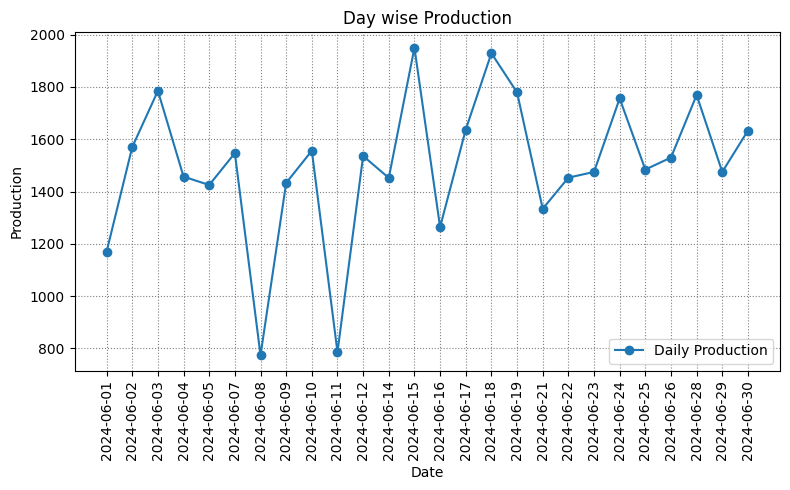

In [33]:
daywise_pro = df_production.groupby(['Date'])[['Production']].sum()
plt.figure(figsize=(8,5))
plt.plot(daywise_pro.index,daywise_pro.values,marker ='o',label = 'Daily Production')
plt.xticks(rotation=90)
plt.title('Day wise Production')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend(loc='lower right')
plt.grid(color ='grey', linestyle = ':')
plt.tight_layout()
plt.show()

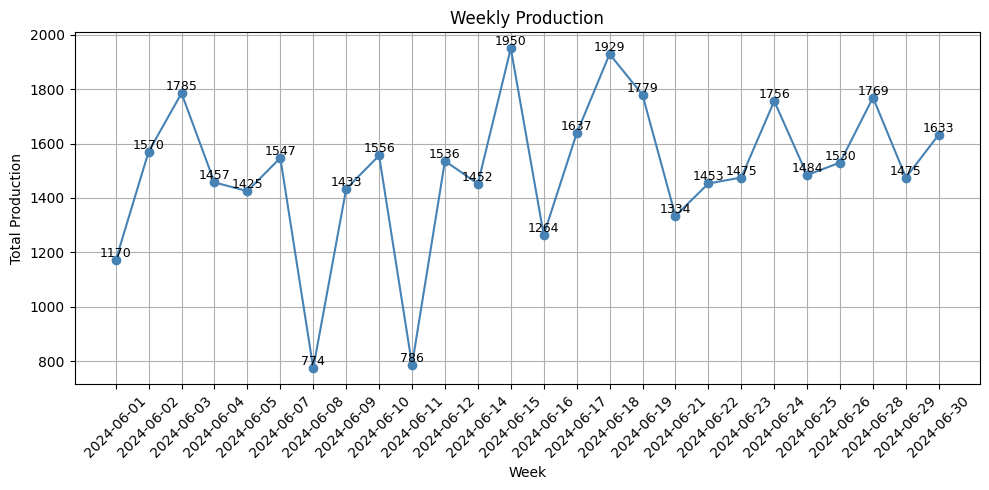

In [34]:
x = daywise_pro.index
y = daywise_pro.values

plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='o', linestyle='-', color='steelblue')

# Add data labels at each point
for i in range(len(x)):
    plt.text(x[i], y[i], f'{int(y[i].item())}', ha='center', va='bottom', fontsize=9, color='black')


plt.title('Weekly Production')
plt.xlabel('Week')
plt.ylabel('Total Production')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
daywise_pro.index = pd.to_datetime(daywise_pro.index)


In [36]:
print(type(daywise_pro.index))
print(daywise_pro.index)


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
DatetimeIndex(['2024-06-01', '2024-06-02', '2024-06-03', '2024-06-04',
               '2024-06-05', '2024-06-07', '2024-06-08', '2024-06-09',
               '2024-06-10', '2024-06-11', '2024-06-12', '2024-06-14',
               '2024-06-15', '2024-06-16', '2024-06-17', '2024-06-18',
               '2024-06-19', '2024-06-21', '2024-06-22', '2024-06-23',
               '2024-06-24', '2024-06-25', '2024-06-26', '2024-06-28',
               '2024-06-29', '2024-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)


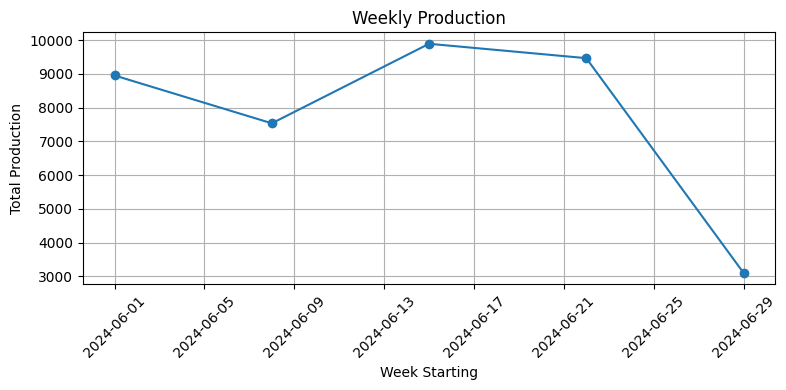

In [37]:
weekly_df = daywise_pro.resample('7D').sum()  # or .mean(), .max(), etc. as needed
plt.figure(figsize=(8,4))
plt.plot(weekly_df.index, weekly_df.values, marker='o')
plt.title('Weekly Production')
plt.xlabel('Week Starting')
plt.ylabel('Total Production')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()




In [47]:
df.sample(5,random_state=4)

,Date,Shift,Part No,Production Quantity,Filter nut plate wrong (S),Filter screen overlap (S),Filter dent & damage (S),Filter paint not ok (S),Filter screen not ok (S),Filter nut plate thread damage/ Go gauge not pass in nut plate thread (S),No GO gauge pass in nut plate thread (S),Head sealing surface damage (R),Wrong filter (S),Wrong head (R),Head rusty (R),Supplier mounted adaptor thread damage (R),Go gauge not pass in head port (R),No Go gauge pass in head port (R),Wrong Drain valve (S),Loose DV clip fitment (S),Drain valve damage (S),Drain valve wire cut (S),DV pipe missing (S),Flow tube fall inside filter (S),Part found with PPI rejection marking ( R),Cartridge/ Element O ring miss (R),Filter gasket/ grommet cut (S),Head adaptor rusty (R),Filter seam shift (S),Adaptor/ Connector dent/damage ®,DV incline fitment S),DV O ring miss (S),DV loose(S),Parts received without PPI inspection ®,DV torque confirmation marking miss (S),ADV thread not ok (R),ADV wire cut (R),Supplier head mounting adaptor loose ( R),Shell grove OD oversize (R),Supplier's head mounting adaptor height not ok ( R),Leak through filter seam (S),Filter Squarness not ok (S),Head Squarness not ok (R),Filter crimp nut leak (S),Head casting leak (R),VPP head leak through crimp portion (P),VPP head leak through rivet joint (P),Leak through breathing/ bleed screw (R),VPP head leak due to defect in diaphragm (R),Head leak through sealing surface (P),Head leak through sealing surface (R),Head leak from O ring/ gasket (P),Head leakage through adaptor/ connector (P),HPP leak through priming pump (P),Filter flow path blockage (S),Casting head gallery blockage (R),Leakage through washer sealing (P),Head leak through adaptor (P),DV leak from body (S),ADV leak from body (R),DV leak from O-ring (S),Assembly fall inside water tank (P),Leak through heater (R),Leakage through plastic bleed screw (R),VPP head leak due to Head flatness not ok (R),Leakage through filter shell (S),Leak through filter sensor body (S),Adaptor/ Connector crack ®,Leakge through washer sealing (R),Dent /damage on connector(P),Head sealing surface damage (P),Head sealing surface flatness not ok (P),Bulging at head sealing surface (P),Go gauge not pass in head port (P),No Go gauge pass in head port (P),Filter damage (P),Wrong filter (P),Wrong head (P),Leak test identification mark missing (P),Functional test mark missing on head (P),Scratch mark on filter (P),Filter paint not ok (P),Washer missing on adaptor/ connector asy (P),Torque mark missing on adaptor/ connector (P),O ring presence dot mark missing (P),Element present dot mark missing on hydraulic filter (P),Head damage (P),Reed valve damage (P),Loosening of Adaptor/Pump (P),Double washer on adaptor/ connector asy (P),Supplier leak testing punch missing (R),Washer missing (P),Washer missing (R),Scratch on head sealing surface (P),HPP pump not lock ®
66,2024-06-04,II,8710137,24,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
152,2024-06-11,I,8710137,48,nan,nan,nan,4,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
123,2024-06-09,I,8710196,24,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,n